<a href="https://colab.research.google.com/github/HiteshPandharkar/Handwritten-Letter-Recognition-On-MNIST-Dataset-With-ANN/blob/main/IISER_Keras_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mnist

Importing necessary packages.

In [ ]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Below statement shows the GPU info alloted for the notebook. Do a factory reset to get different one.

In [ ]:
!nvidia-smi

Sun Nov  8 08:45:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

importing train and test mnist images. 

In [ ]:
train = mnist.train_images() # 28x28 images
tlabel = mnist.train_labels()

test = mnist.test_images()
tst_label = mnist.test_labels()

In [ ]:
#train

In [ ]:
#train.ndim

In [ ]:
#len(train), len(test)

(60000, 10000)

In [ ]:
#train.shape

(60000, 28, 28)

A sample image

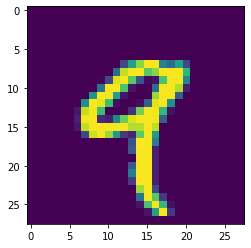

In [ ]:
plt.imshow(train[4])
plt.show()

Normalizing the data from 0-255 to 0-1

In [ ]:
train = train/255
test = test/255

Reshaping the data into a 28^2 = 784 dimensional vector.

In [ ]:
train = train.reshape(-1, 784)
test = test.reshape(-1, 784)

train[1].ndim

1

In [ ]:
#train.ndim

2

In [ ]:
#train.shape

(60000, 784)

In [ ]:
#train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Building the models.

## Part-1

In [ ]:
model1 = Sequential([
                    Dense(378, activation='sigmoid', input_dim=784),
                    Dense(10, activation='softmax')])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 378)               296730    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3790      
Total params: 300,520
Trainable params: 300,520
Non-trainable params: 0
_________________________________________________________________


The trainable parameters are 300,520
Nuerons in 1st layes:- 296352
Bias for 1st layer:- 378

Nuerons in 2nd layes:- 3780
Bias for 2nd layer:- 10

Total neurons:- 292950
Total bias:- 388

In [ ]:
296730-3780

292950

In [ ]:
296352/378

784.0

In [ ]:
model1.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model1.fit(train, to_categorical(tlabel), batch_size=1, epochs = 10, validation_split=.3)

Epoch 1/10
42000/42000 [==============================] - 99s 2ms/step - loss: 0.4355 - accuracy: 0.8686 - val_loss: 0.3035 - val_accuracy: 0.9129
Epoch 2/10
42000/42000 [==============================] - 100s 2ms/step - loss: 0.2690 - accuracy: 0.9213 - val_loss: 0.2381 - val_accuracy: 0.9332
Epoch 3/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.2064 - accuracy: 0.9400 - val_loss: 0.1921 - val_accuracy: 0.9449
Epoch 4/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.1642 - accuracy: 0.9517 - val_loss: 0.1670 - val_accuracy: 0.9519
Epoch 5/10
42000/42000 [==============================] - 99s 2ms/step - loss: 0.1358 - accuracy: 0.9610 - val_loss: 0.1508 - val_accuracy: 0.9565
Epoch 6/10
42000/42000 [==============================] - 99s 2ms/step - loss: 0.1156 - accuracy: 0.9664 - val_loss: 0.1357 - val_accuracy: 0.9615
Epoch 7/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.0995 - accuracy: 0.9711 - val_loss: 

**About how long did each epoch take?**

-> On average each epoch needs 98 seconds.

**How accurate was this model on the validation data after 10 epochs?**
-> The validation accuracy seems to converge at 96%.

**How different was the model's performance on the training data?**
-> The validation accuracy seems to converge at 98%.


Evaluating the model on test data.

In [ ]:
model1.evaluate(test, to_categorical(tst_label))

313/313 [==============================] - 1s 2ms/step - loss: 0.0935 - accuracy: 0.9722


[0.09347612410783768, 0.9721999764442444]

**How different was the model's performance on the test data?**

-> The validation accuracy seems to converge at 97%.

Sample predictiions.

In [ ]:
pred = model1.predict(test[:10])
print(np.argmax(pred, axis = 1))
print(tst_label[:10])

[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


Sample images.

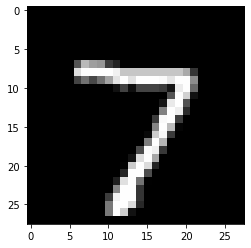

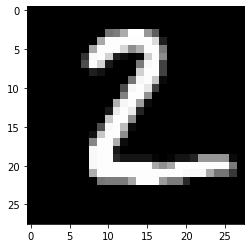

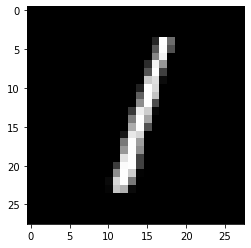

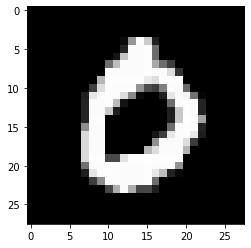

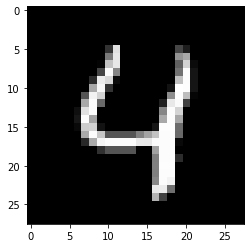

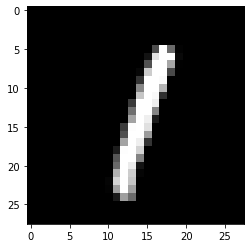

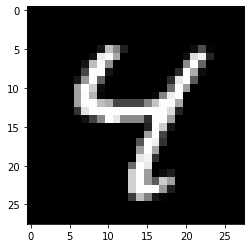

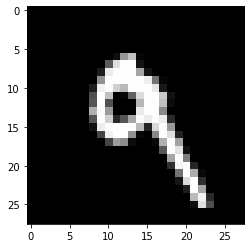

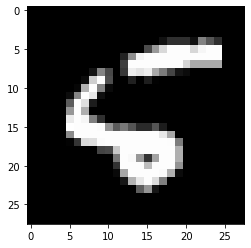

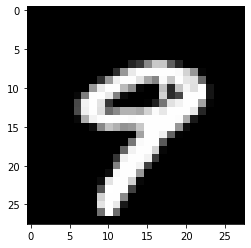

In [ ]:
for i in range(10) :
  img = test[i]
  img = img.reshape((28, 28))
  plt.imshow(img, cmap='gray')
  plt.show()

## Part-1 Model-2

In [ ]:
model2 = Sequential([
                     Dense(63, activation = 'sigmoid', input_dim = 784),
                     Dense(10, activation='softmax')])

model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 63)                49455     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                640       
Total params: 50,095
Trainable params: 50,095
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='SGD', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(train, to_categorical(tlabel), batch_size=1, epochs=10, validation_split=.3)

Epoch 1/10
42000/42000 [==============================] - 97s 2ms/step - loss: 0.4243 - accuracy: 0.8818 - val_loss: 0.2641 - val_accuracy: 0.9245
Epoch 2/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.2301 - accuracy: 0.9326 - val_loss: 0.2105 - val_accuracy: 0.9382
Epoch 3/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.1793 - accuracy: 0.9482 - val_loss: 0.1805 - val_accuracy: 0.9479
Epoch 4/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.1487 - accuracy: 0.9567 - val_loss: 0.1631 - val_accuracy: 0.9528
Epoch 5/10
42000/42000 [==============================] - 97s 2ms/step - loss: 0.1273 - accuracy: 0.9625 - val_loss: 0.1476 - val_accuracy: 0.9569
Epoch 6/10
42000/42000 [==============================] - 97s 2ms/step - loss: 0.1106 - accuracy: 0.9680 - val_loss: 0.1365 - val_accuracy: 0.9613
Epoch 7/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.0968 - accuracy: 0.9731 - val_loss: 0

In [ ]:
model2.evaluate(test, to_categorical(tst_label))

313/313 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9673


[0.1052788719534874, 0.9672999978065491]

In [ ]:
pred = model2.predict(test[:10])
print(np.argmax(pred, axis = 1))
print(tst_label[:10])

[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


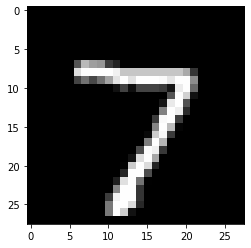

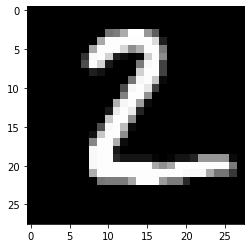

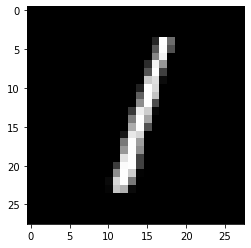

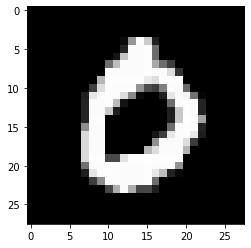

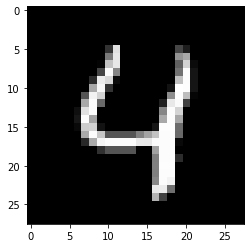

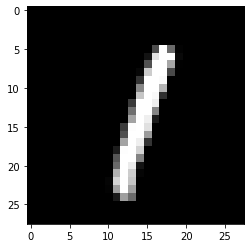

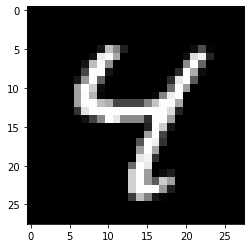

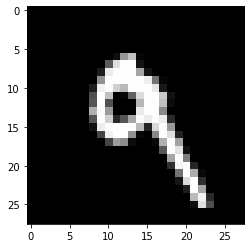

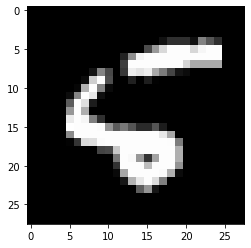

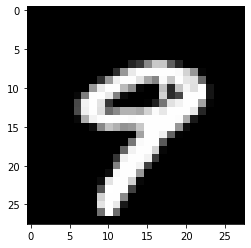

In [ ]:
for i in range(10) :
  img = test[i].reshape((28, 28))
  plt.imshow(img, cmap = 'gray')
  plt.show()

## Part-2

#### Model-1

In [ ]:
model3 = Sequential([
                     Dense(10, activation = 'sigmoid', input_dim = 784),
                     Dense(10, activation='sigmoid'),
                     Dense(10, activation='sigmoid'),
                     Dense(10, activation='sigmoid'),
                     Dense(10, activation='sigmoid'),
                     Dense(10, activation='sigmoid'),
                     Dense(10, activation='sigmoid'),
                     Dense(10, activation='sigmoid'),
                     Dense(10, activation='sigmoid'),
                     Dense(10, activation='sigmoid'),
                     Dense(10, activation='softmax')])

model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1

In [ ]:
model3.compile(optimizer='SGD', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model3.fit(train, to_categorical(tlabel), batch_size=1, epochs=10, validation_split=.3)

Epoch 1/10
42000/42000 [==============================] - 134s 3ms/step - loss: 2.3073 - accuracy: 0.1036 - val_loss: 2.3060 - val_accuracy: 0.1035
Epoch 2/10
42000/42000 [==============================] - 135s 3ms/step - loss: 2.3055 - accuracy: 0.1060 - val_loss: 2.3072 - val_accuracy: 0.1079
Epoch 3/10
42000/42000 [==============================] - 132s 3ms/step - loss: 2.3047 - accuracy: 0.1067 - val_loss: 2.3036 - val_accuracy: 0.1079
Epoch 4/10
42000/42000 [==============================] - 131s 3ms/step - loss: 2.3037 - accuracy: 0.1069 - val_loss: 2.3032 - val_accuracy: 0.1079
Epoch 5/10
42000/42000 [==============================] - 129s 3ms/step - loss: 2.3039 - accuracy: 0.1074 - val_loss: 2.3019 - val_accuracy: 0.1035
Epoch 6/10
42000/42000 [==============================] - 129s 3ms/step - loss: 2.3036 - accuracy: 0.1077 - val_loss: 2.3044 - val_accuracy: 0.1079
Epoch 7/10
42000/42000 [==============================] - 131s 3ms/step - loss: 2.3033 - accuracy: 0.1099 - val_

In [ ]:
model3.evaluate(test, to_categorical(tst_label))

313/313 [==============================] - 1s 2ms/step - loss: 2.3031 - accuracy: 0.0974


[2.303091526031494, 0.09740000218153]

### Model-2

In [ ]:
r.seed(1)

model4 = Sequential([
                     Dense(r.randint(10, 50), activation = 'sigmoid', input_dim = 784),
                     Dense(r.randint(10, 50), activation='sigmoid'),
                     Dense(r.randint(10, 50), activation='sigmoid'),
                     Dense(r.randint(10, 50), activation='sigmoid'),
                     Dense(r.randint(10, 50), activation='sigmoid'),
                     Dense(r.randint(10, 50), activation='sigmoid'),
                     Dense(r.randint(10, 50), activation='sigmoid'),
                     Dense(r.randint(10, 50), activation='sigmoid'),
                     Dense(r.randint(10, 50), activation='sigmoid'),
                     Dense(r.randint(10, 50), activation='sigmoid'),
                     Dense(10, activation='softmax')])

model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 18)                14130     
_________________________________________________________________
dense_12 (Dense)             (None, 46)                874       
_________________________________________________________________
dense_13 (Dense)             (None, 14)                658       
_________________________________________________________________
dense_14 (Dense)             (None, 26)                390       
_________________________________________________________________
dense_15 (Dense)             (None, 17)                459       
_________________________________________________________________
dense_16 (Dense)             (None, 41)                738       
_________________________________________________________________
dense_17 (Dense)             (None, 38)               

In [ ]:
model4.compile(optimizer='SGD', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model3.fit(train, to_categorical(tlabel), batch_size=1, epochs=5, validation_split=.3)

Epoch 1/5
42000/42000 [==============================] - 122s 3ms/step - loss: 2.3036 - accuracy: 0.1084 - val_loss: 2.3048 - val_accuracy: 0.1079
Epoch 2/5
42000/42000 [==============================] - 125s 3ms/step - loss: 2.3033 - accuracy: 0.1108 - val_loss: 2.3025 - val_accuracy: 0.1079
Epoch 3/5
42000/42000 [==============================] - 125s 3ms/step - loss: 2.3032 - accuracy: 0.1088 - val_loss: 2.3027 - val_accuracy: 0.1079
Epoch 4/5
42000/42000 [==============================] - 126s 3ms/step - loss: 2.3033 - accuracy: 0.1096 - val_loss: 2.3048 - val_accuracy: 0.1079
Epoch 5/5
42000/42000 [==============================] - 128s 3ms/step - loss: 2.3034 - accuracy: 0.1087 - val_loss: 2.3038 - val_accuracy: 0.1079


In [ ]:
model3.evaluate(test, to_categorical(tst_label))

313/313 [==============================] - 1s 2ms/step - loss: 2.3022 - accuracy: 0.1135


[2.302239179611206, 0.11349999904632568]

### Model-3

In [ ]:
r.seed(1)

model5 = Sequential([
                     Dense(r.randint(50, 100), activation = 'sigmoid', input_dim = 784),
                     Dense(r.randint(50, 100), activation='sigmoid'),
                     Dense(r.randint(50, 100), activation='sigmoid'),
                     Dense(r.randint(50, 100), activation='sigmoid'),
                     Dense(r.randint(50, 100), activation='sigmoid'),
                     Dense(r.randint(50, 100), activation='sigmoid'),
                     Dense(r.randint(50, 100), activation='sigmoid'),
                     Dense(r.randint(50, 100), activation='sigmoid'),
                     Dense(r.randint(50, 100), activation='sigmoid'),
                     Dense(r.randint(50, 100), activation='sigmoid'),
                     Dense(10, activation='softmax')])

model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 58)                45530     
_________________________________________________________________
dense_23 (Dense)             (None, 86)                5074      
_________________________________________________________________
dense_24 (Dense)             (None, 98)                8526      
_________________________________________________________________
dense_25 (Dense)             (None, 54)                5346      
_________________________________________________________________
dense_26 (Dense)             (None, 66)                3630      
_________________________________________________________________
dense_27 (Dense)             (None, 57)                3819      
_________________________________________________________________
dense_28 (Dense)             (None, 81)               

In [ ]:
model5.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model5.fit(train, to_categorical(tlabel), batch_size=1, epochs=5, validation_split=.3)

Epoch 1/5
42000/42000 [==============================] - 127s 3ms/step - loss: 2.3146 - accuracy: 0.1036 - val_loss: 2.3135 - val_accuracy: 0.1079
Epoch 2/5
42000/42000 [==============================] - 129s 3ms/step - loss: 2.3044 - accuracy: 0.1066 - val_loss: 2.3053 - val_accuracy: 0.1079
Epoch 3/5
42000/42000 [==============================] - 130s 3ms/step - loss: 2.3038 - accuracy: 0.1081 - val_loss: 2.3030 - val_accuracy: 0.1079
Epoch 4/5
42000/42000 [==============================] - 132s 3ms/step - loss: 2.3039 - accuracy: 0.1088 - val_loss: 2.3026 - val_accuracy: 0.1079
Epoch 5/5
42000/42000 [==============================] - 130s 3ms/step - loss: 2.3036 - accuracy: 0.1092 - val_loss: 2.3037 - val_accuracy: 0.1079


In [ ]:
model5.evaluate(test, to_categorical(tst_label))

313/313 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.1135


[2.3028409481048584, 0.11349999904632568]

**Did any of these models achieve better than 20% accuracy on validation or test data?**

-> None of the models performed better than 20%.

**How many total trainable parameters do each of these models have?**

-> Model-1:- 
trainable parameters = 8,950

-> Model-2:- 
trainable parameters = 22,844


-> Model-3:- 
trainable parameters = 99,511

**Is there a clear correlation between number of trainable parameters and accuracy?**

-> Part-1 model had 300,000 thousand parameters and part-2 models have parameters way less than that of the former. 

## Part-3

In [ ]:
model = Sequential([
                    Dense(340, activation='sigmoid', input_dim=784),
                    Dense(340, activation='sigmoid'),
                    Dense(340, activation='sigmoid'),
                    Dense(10, activation='softmax')])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 340)               266900    
_________________________________________________________________
dense_66 (Dense)             (None, 340)               115940    
_________________________________________________________________
dense_67 (Dense)             (None, 340)               115940    
_________________________________________________________________
dense_68 (Dense)             (None, 10)                3410      
Total params: 502,190
Trainable params: 502,190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train, to_categorical(tlabel), batch_size=1, epochs = 10, validation_split=.3)

Epoch 1/10
42000/42000 [==============================] - 103s 2ms/step - loss: 1.1029 - accuracy: 0.6123 - val_loss: 0.3926 - val_accuracy: 0.8851
Epoch 2/10
42000/42000 [==============================] - 102s 2ms/step - loss: 0.3587 - accuracy: 0.8940 - val_loss: 0.2871 - val_accuracy: 0.9139
Epoch 3/10
42000/42000 [==============================] - 101s 2ms/step - loss: 0.2687 - accuracy: 0.9197 - val_loss: 0.2378 - val_accuracy: 0.9293
Epoch 4/10
42000/42000 [==============================] - 102s 2ms/step - loss: 0.2101 - accuracy: 0.9370 - val_loss: 0.2117 - val_accuracy: 0.9359
Epoch 5/10
42000/42000 [==============================] - 101s 2ms/step - loss: 0.1726 - accuracy: 0.9478 - val_loss: 0.1854 - val_accuracy: 0.9443
Epoch 6/10
42000/42000 [==============================] - 101s 2ms/step - loss: 0.1447 - accuracy: 0.9565 - val_loss: 0.1486 - val_accuracy: 0.9553
Epoch 7/10
42000/42000 [==============================] - 103s 2ms/step - loss: 0.1239 - accuracy: 0.9632 - val_

In [ ]:
model.evaluate(test, to_categorical(tst_label))

313/313 [==============================] - 1s 2ms/step - loss: 0.1171 - accuracy: 0.9642


[0.1170513927936554, 0.9642000198364258]

**Which network(part-1 model or part-3 model) achieved the best accuracy on test data after training?**

-> Netork iin part-3(96%) had higher accuracy than newtork in part-1(93%).

**Did the networks train for a similar number of epochs?**

-> The networks are trained for equal number of epochs.